In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # to use as default over matplotlib
from sklearn.cluster import KMeans # clustering model

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


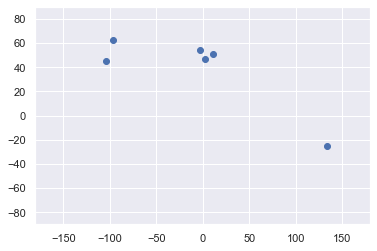

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180) # to resemble actual Longitude
plt.ylim(-90,90) # to resemble actual Latitude
plt.show()

In [9]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [18]:
kmeans = KMeans(3) # cluster with 3 clusters
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [20]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


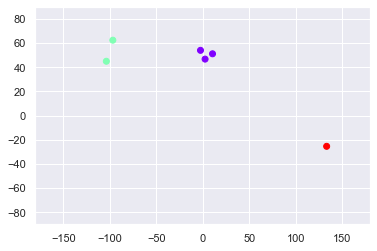

In [21]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180) # to resemble actual Longitude
plt.ylim(-90,90) # to resemble actual Latitude
plt.show()

In [27]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'German':1, 'French':2})

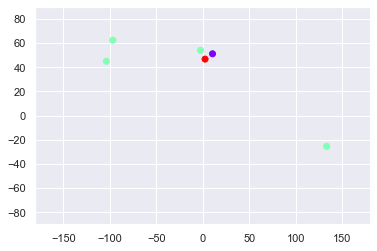

In [34]:
x1 = data_mapped.iloc[:, 3:4]
kmeans1 = KMeans(3) # cluster with 3 clusters
kmeans1.fit(x1)
identified_clusters1 = kmeans1.fit_predict(x1)
data_with_clusters1 = data.copy()
data_with_clusters1['Clusters'] = identified_clusters1
data_with_clusters1
plt.scatter(data_with_clusters1['Longitude'],data_with_clusters1['Latitude'], c=data_with_clusters1['Clusters'], cmap='rainbow')
plt.xlim(-180,180) # to resemble actual Longitude
plt.ylim(-90,90) # to resemble actual Latitude
plt.show()

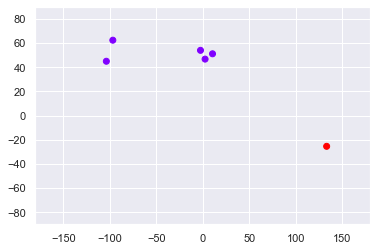

In [35]:
x2 = data_mapped.iloc[:, 1:4]
kmeans2 = KMeans(2) # cluster with 3 clusters
kmeans2.fit(x2)
identified_clusters2 = kmeans2.fit_predict(x2)
data_with_clusters2 = data.copy()
data_with_clusters2['Clusters'] = identified_clusters2
data_with_clusters2
plt.scatter(data_with_clusters2['Longitude'],data_with_clusters2['Latitude'], c=data_with_clusters2['Clusters'], cmap='rainbow')
plt.xlim(-180,180) # to resemble actual Longitude
plt.ylim(-90,90) # to resemble actual Latitude
plt.show()

In [37]:
kmeans.inertia_

290.10523333333333

In [49]:
wcss = []
x3 = data_mapped.iloc[:, 1:4]
for i in range(1,x3.shape[0]):
    kmeans = KMeans(i)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 40.50624999999998,
 0.0]

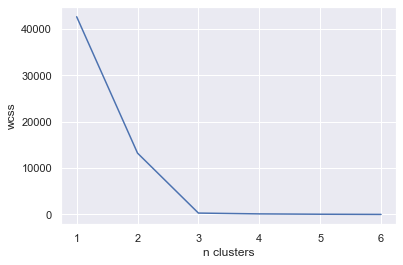

In [50]:
# plot the wcss
n_clusters = range(1,x3.shape[0]+1)
plt.plot(n_clusters, wcss)
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show() # => 3 is the perfect number of clusters